
<h1>Задание 1</h1>

У вас есть небольшой искусственный датасет: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/data   

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
data = pd.read_csv("shopping_trends_updated.csv")
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [3]:
data.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

<h2>Задание 1.1</h2>

На основании этих данных необходимо составить максимальное(но не менее пяти) количество гипотез о корреляциях между отдельными столбцами и проверить их. 

При этом при составлении гипотез можно рассматривать не полный df, а именно выборки (например: "женщины старше 40 лет покупают в основном осенью")

Гипотеза 1. Мужчины при покупке реже обращают внимание на рейтинг товара, поэтому средкий рейтинг по покупкам у женщим будет выше, чем у мужчин

In [162]:
avg_rating = data.groupby('Gender')['Review Rating'].mean().reset_index()
avg_rating

,Gender,Review Rating
0,Female,3.741426
1,Male,3.753959


<b>Гипотеза 1  опровергнута, средний рейтинг одинаковый вне зависимости от пола.</b>

Гипотеза 2. Молодые женщины 18-30 лет чаще покупают, чем мужчины

In [170]:
data_young = data[(data['Age'] >= 18) & (data['Age'] <= 30)]
data_young = data_young['Gender'].value_counts()
data_young

Gender
Male      654
Female    295
Name: count, dtype: int64

<b>Гипотеза 2 опровергнута. Молодые мужчины в возрасте 18-30 лет покупают чаще женщин.</b>

Гипотеза 3. Летом покупают больше обуви, чем зимой.

In [173]:
data_fall = data[data['Category'] == 'Footwear'].groupby('Season').size().reset_index(name='Count')
data_fall

,Season,Count
0,Fall,136
1,Spring,163
2,Summer,160
3,Winter,140


Гипотеза 3 подтвердилась, летом покупают больше обуви, чем зимой

<b>Гипотеза 4. В Миннесоте покупают больше люди 40 лет и старше, чем моложе 40 лет</b>

In [186]:
data_min = data[data['Location'] == 'Minnesota']
data_min_40plus = data_min[data_min['Age'] >= 40].shape[0]
data_min_40less = data_min[data_min['Age'] < 40].shape[0]
print(f"Количество людей 40 лет и старше: {data_min_40plus}")
print(f"Количество людей младше 40 лет: {data_min_40less}")

Количество людей 40 лет и старше: 52
Количество людей младше 40 лет: 36


Гипотеза 4 подтвердилась. В Миннесоте больше покупают люди старше 40 лет.

<b>Гипотеза 5. В Калифорнии женщины покупают чаще размер S</b>

In [194]:
data_clf = data[data['Location'] == 'California']
data_clf = data_clf[data_clf['Gender']=='Female'].groupby('Size').size().reset_index(name='Count')
data_clf

,Size,Count
0,L,6
1,M,16
2,S,3
3,XL,4


In [ ]:
Гипотеза 5 не подтвердилась. Чаще всего женщины в Калифорнии покупают размер M

<h2>Задание 1.2</h2>

Помимо гипотез:
* найдите самый популярный товар
* постройте распределение покупателей по полу
* определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары
* определите, есть ли зависимость между цветом одежды и сезоном.
* посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.
* найдите самую популярную букву в названии одежды. 

<b>Найдите самый популярный товар</b>

In [48]:
item_counts = data['Item Purchased'].value_counts()

# Выводим товар, который покупается чаще всего
popular_item = item_counts.idxmax()
print('Самый популярный товар: ', popular_item)

Самый популярный товар:  Blouse


<b>постройте распределение покупателей по полу</b>

In [38]:
gender_counts = data['Gender'].value_counts()
print(gender_counts)

Gender
Male      2652
Female    1248
Name: count, dtype: int64


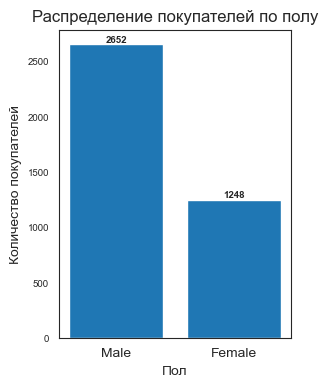

In [47]:
gender_count = data['Gender'].value_counts()
x = gender_count.index #задаем оси
y = gender_count.values
fig, ax = plt.subplots(figsize=(3,4)) 
#сторим диаграмму, задаем расстоияние мужду барами)
bars = plt.bar(x, y) 

ax.spines[['right', 'top', 'bottom']].set_visible(True) #jcnfdkztv границы видимыми
ax.xaxis.set_visible(True) #оставляем видимой ось х
ax.yaxis.set_tick_params(labelsize=7) #выставляем размер шрифта
sns.set_style('white')

ax.bar_label(bars, fontsize=7, label_type='edge', fontweight='bold')
plt.title('Распределение покупателей по полу')
plt.xlabel('Пол')
plt.ylabel('Количество покупателей')
plt.show()

<b>определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары</b>

In [77]:
data['Purchase Amount (USD)'].describe() #посмотрим распределение стоимости товаров

count    3900.000000
mean       59.764359
std        23.685392
min        20.000000
25%        39.000000
50%        60.000000
75%        81.000000
max       100.000000
Name: Purchase Amount (USD), dtype: float64

In [76]:
data['Age'].describe() #посмотрим распределение по возрасту

count    3900.000000
mean       44.068462
std        15.207589
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64

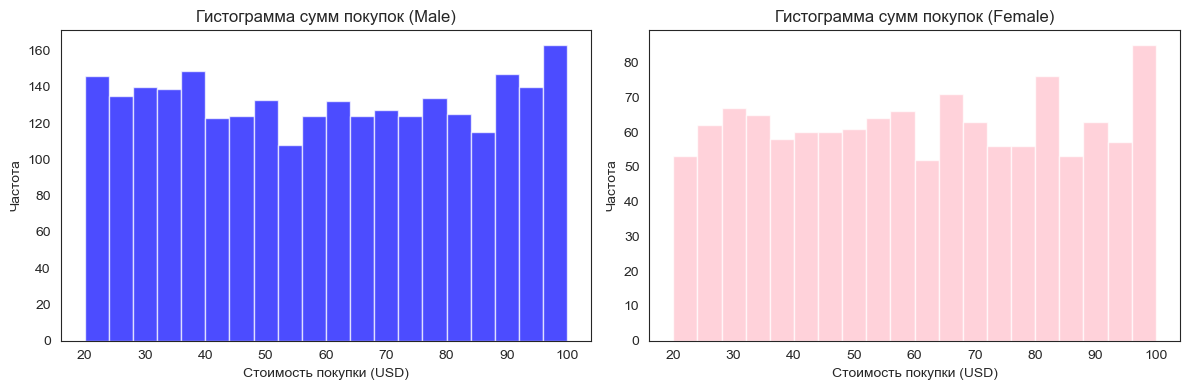

In [75]:
#построим гистограммы по male и female по частоте появления разных стоимостей покупок
data_male = data[data['Gender'] == 'Male'][['Purchase Amount (USD)', 'Age']]
data_female = data[data['Gender'] == 'Female'][['Purchase Amount (USD)', 'Age']]

plt.figure(figsize=(12, 4))

# Гистограмма для мужчин
plt.subplot(1, 2, 1)  
plt.hist(data_male['Purchase Amount (USD)'], bins=20, color='blue', alpha=0.7)
plt.title('Гистограмма сумм покупок (Male)')
plt.xlabel('Стоимость покупки (USD)')
plt.ylabel('Частота')

# Гистограмма для женщин
plt.subplot(1, 2, 2)  
plt.hist(data_female['Purchase Amount (USD)'], bins=20, color='pink', alpha=0.7)
plt.title('Гистограмма сумм покупок (Female)')
plt.xlabel('Стоимость покупки (USD)')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Таким образом, у мужчин частота покупок дорогих товаров выше, чем у женщин.

Посмотрим частоту появления высокой цены по возрасту, разделив стоимость покупок и возраст на диапазоны для удобства визуализации 

C:\Users\Expert\AppData\Local\Temp\ipykernel_13024\1793914266.py:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = data.pivot_table(values='Purchase Amount (USD)',


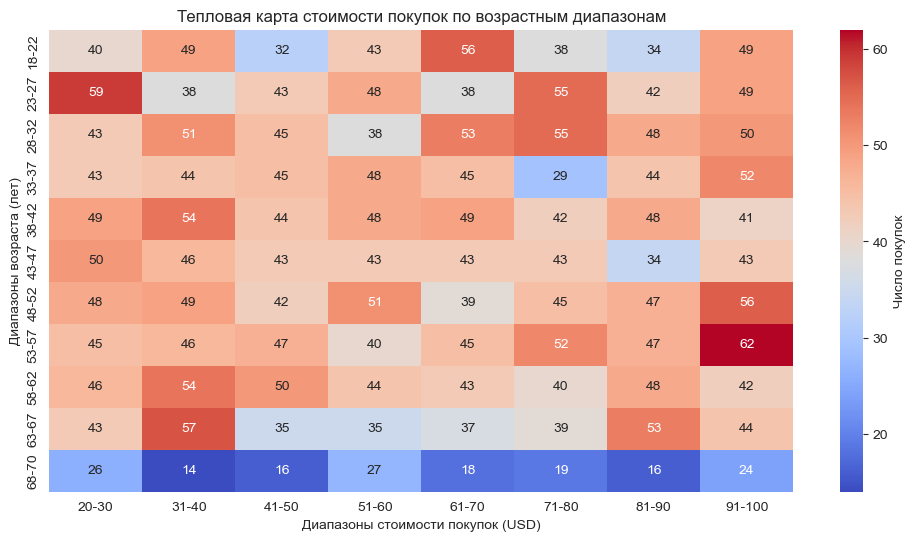

In [73]:
age_bins = [18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 70]
age_labels = ['18-22', '23-27', '28-32', '33-37', '38-42', '43-47', '48-52', '53-57', '58-62', '63-67', '68-70']
data['Age Range'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Разделение стоимости покупок на диапазоны от 20 до 100
purchase_bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]  # без значений выше 100
purchase_labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
data['Purchase Amount Range'] = pd.cut(data['Purchase Amount (USD)'], bins=purchase_bins, labels=purchase_labels, right=False)

# Создание сводной таблицы
pivot_table = data.pivot_table(values='Purchase Amount (USD)', 
                              index='Age Range', 
                              columns='Purchase Amount Range', 
                              aggfunc='count', fill_value=0)

# Построение тепловой карты
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='g', cbar_kws={'label': 'Число покупок'})
plt.title('Тепловая карта стоимости покупок по возрастным диапазонам')
plt.xlabel('Диапазоны стоимости покупок (USD)')
plt.ylabel('Диапазоны возраста (лет)')
plt.show()

In [ ]:
Таким образом, чаще всего совершали дорогие покупки в возрасте 53-57 лет

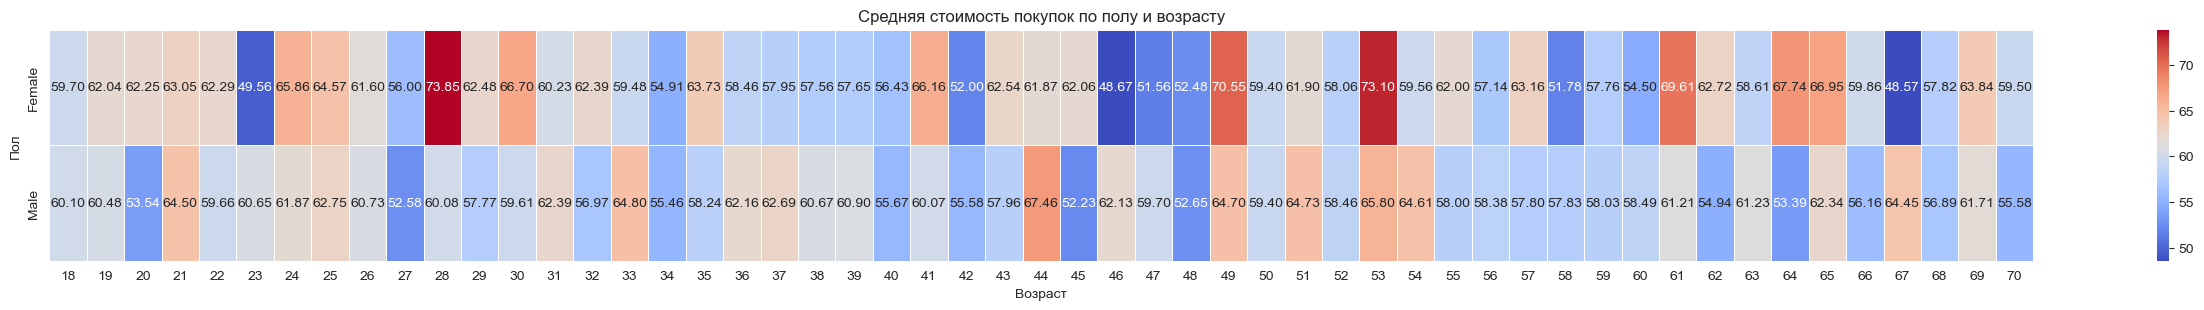

In [74]:
# если сделать разбивку и по возрасту, и по полу
heatmap_data = data.groupby(['Gender', 'Age'])['Purchase Amount (USD)'].mean().unstack()

# Создание тепловой карты
plt.figure(figsize=(32, 3))  # Установка размера графика
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Настройка заголовков и меток осей
plt.title('Средняя стоимость покупок по полу и возрасту')
plt.xlabel('Возраст')
plt.ylabel('Пол')

# Отображение графика
plt.show()

In [ ]:
здесь видно, что самые дорогие покупки совершали женщины в возрасте 28 и 53 лет, что частично подтверждает предыдущую тепловую карту

<b>посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику</b>

In [78]:
cust_per_season = data.groupby('Season')['Customer ID'].nunique().reset_index()
cust_per_season

,Season,Customer ID
0,Fall,975
1,Spring,999
2,Summer,955
3,Winter,971


<b>найдите самую популярную букву в названии одежды</b>

In [81]:
from collections import Counter
all_items = ''.join(data['Item Purchased'].astype(str))

# Подсчет частоты каждой буквы в словах, не чувствительных к регистру
letter_count = Counter(all_items.lower())

# Находим самую популярную букву
pop_letter = letter_count.most_common(1)

if most_common_letter:
    letter, count =pop_letter[0]
    print(f'Самая популярная буква в названии одежды: "{letter}" с количеством {count}.')

Самая популярная буква в названии одежды: "s" с количеством 4063.


<h1>Задание 2</h1> 

У нас есть данные о потреблении алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption. 

Загрузите их и изучите, где же люди пьют больше вина, пива и других спиртных напитков.

In [83]:
drinks = pd.read_csv("drinks.csv")
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
...,...,...,...,...,...
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5


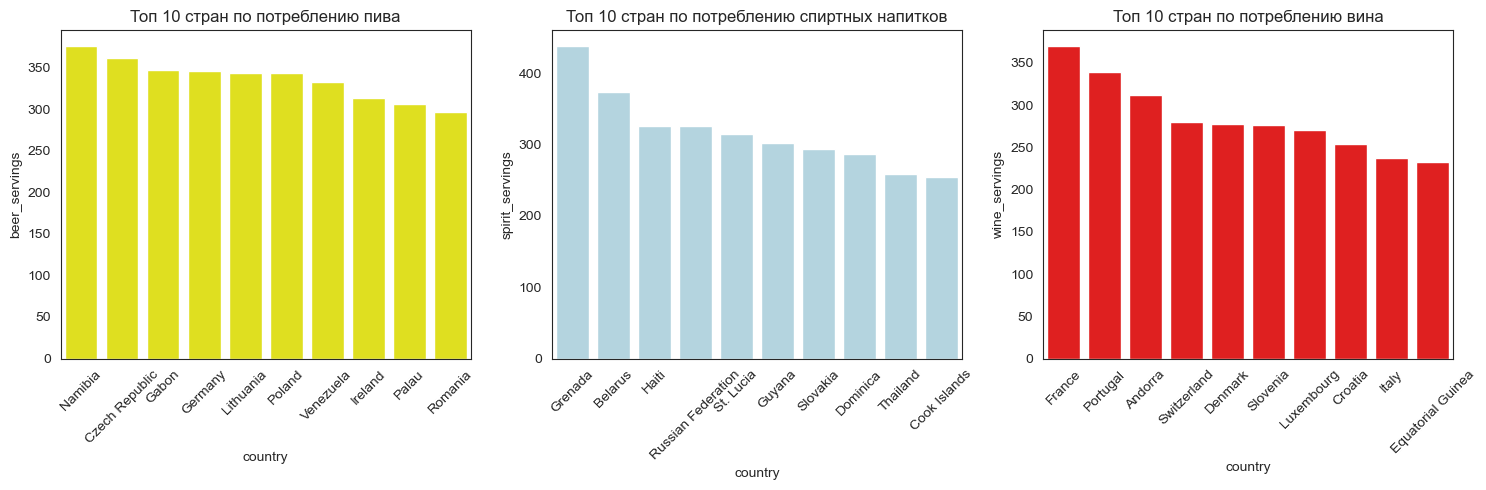

In [86]:
# Сортировка по beer_servings, spirit_servings и wine_servings
top_beer = drinks.sort_values(by='beer_servings', ascending=False).head(10)
top_spirit = drinks.sort_values(by='spirit_servings', ascending=False).head(10)
top_wine = drinks.sort_values(by='wine_servings', ascending=False).head(10)

# Визуализация
plt.figure(figsize=(15, 5))

# График потребления пива (желтый)
plt.subplot(1, 3, 1)
sns.barplot(x='country', y='beer_servings', data=top_beer, color='yellow')
plt.title('Топ 10 стран по потреблению пива')
plt.xticks(rotation=45)

# График потребления спиртных напитков (голубой)
plt.subplot(1, 3, 2)
sns.barplot(x='country', y='spirit_servings', data=top_spirit, color='lightblue')
plt.title('Топ 10 стран по потреблению спиртных напитков')
plt.xticks(rotation=45)

# График потребления вина (красный)
plt.subplot(1, 3, 3)
sns.barplot(x='country', y='wine_servings', data=top_wine, color='red')
plt.title('Топ 10 стран по потреблению вина')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<h1>Задание 3</h1> 

У нас есть полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Определите:

* число проклятий, летальных исходов и их соотношение по фильмам 

* частоту употребления конкретных проклятий 

* распределение времени между проклятиями 

In [195]:
tarantino = pd.read_csv("tarantino.csv")
tarantino

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61
...,...,...,...,...
1889,Jackie Brown,word,motherfucker,141.93
1890,Jackie Brown,word,ass,142.43
1891,Jackie Brown,word,fucking,142.47
1892,Jackie Brown,word,goddamn,142.97


<b>число проклятий, летальных исходов и их соотношение по фильмам</b>

In [91]:
tarantino['type'].value_counts()

type
word     1704
death     190
Name: count, dtype: int64

In [95]:
count_type = tarantino.groupby(['movie', 'type']).size().unstack(fill_value=0)
count_type

type,death,word
movie,,
Django Unchained,47,262
Inglorious Basterds,48,58
Jackie Brown,4,368
Kill Bill: Vol. 1,63,57
Kill Bill: Vol. 2,11,69
Pulp Fiction,7,469
Reservoir Dogs,10,421


<b>частоту употребления конкретных проклятий</b>

In [92]:
tarantino['word'].value_counts()

word
fucking          407
shit             221
fuck             213
n-word           179
ass              140
goddamn          113
motherfucker      70
bitch             64
hell              45
damn              37
motherfucking     27
fucked            25
bullshit          15
motherfuckers     15
dick              14
pussy             11
asshole           10
bastard           10
bitches            9
fucker             8
assholes           5
negro              5
dicks              5
asses              4
shitty             4
damned             3
fucks              3
shithead           3
horseshit          2
gooks              2
japs               2
cunt               2
shitload           2
cocksucker         2
wetback            2
fuckers            1
horeshit           1
jap                1
shittiest          1
fuckup             1
jackass            1
goddamned          1
slut               1
squaw              1
asshead            1
shitting           1
shitless           1
bastards

<b>распределение времени между проклятиями</b>

In [93]:
tarantino['movie'].value_counts()

movie
Pulp Fiction           476
Reservoir Dogs         431
Jackie Brown           372
Django Unchained       309
Kill Bill: Vol. 1      120
Inglorious Basterds    106
Kill Bill: Vol. 2       80
Name: count, dtype: int64

In [96]:
tarantino['minutes_in'].describe()

count    1894.000000
mean       71.529071
std        45.075036
min         0.400000
25%        29.655000
50%        70.525000
75%       112.835000
max       160.450000
Name: minutes_in, dtype: float64

In [97]:
tarantino['word'].describe()

count        1704
unique         60
top       fucking
freq          407
Name: word, dtype: object

In [98]:
tarantino.isna()

,movie,type,word,minutes_in
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
1889,False,False,False,False
1890,False,False,False,False
1891,False,False,False,False
1892,False,False,False,False


In [196]:
tarantino2 = tarantino.dropna()
tarantino2

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61
...,...,...,...,...
1888,Jackie Brown,word,motherfucker,141.80
1889,Jackie Brown,word,motherfucker,141.93
1890,Jackie Brown,word,ass,142.43
1891,Jackie Brown,word,fucking,142.47


In [198]:
bins = np.arange(0, 162, 10)  # интервалы по 10 минут
tarantino2.loc[:, 'time_interval'] = pd.cut(tarantino2['minutes_in'], bins)
tarantino2


,movie,type,word,minutes_in,time_interval
0,Reservoir Dogs,word,dick,0.40,"(0, 10]"
1,Reservoir Dogs,word,dicks,0.43,"(0, 10]"
2,Reservoir Dogs,word,fucked,0.55,"(0, 10]"
3,Reservoir Dogs,word,fucking,0.61,"(0, 10]"
4,Reservoir Dogs,word,bullshit,0.61,"(0, 10]"
...,...,...,...,...,...
1888,Jackie Brown,word,motherfucker,141.80,"(140, 150]"
1889,Jackie Brown,word,motherfucker,141.93,"(140, 150]"
1890,Jackie Brown,word,ass,142.43,"(140, 150]"
1891,Jackie Brown,word,fucking,142.47,"(140, 150]"


In [131]:
tarantino2['movie']

0       Reservoir Dogs
1       Reservoir Dogs
2       Reservoir Dogs
3       Reservoir Dogs
4       Reservoir Dogs
             ...      
1888      Jackie Brown
1889      Jackie Brown
1890      Jackie Brown
1891      Jackie Brown
1892      Jackie Brown
Name: movie, Length: 1704, dtype: object

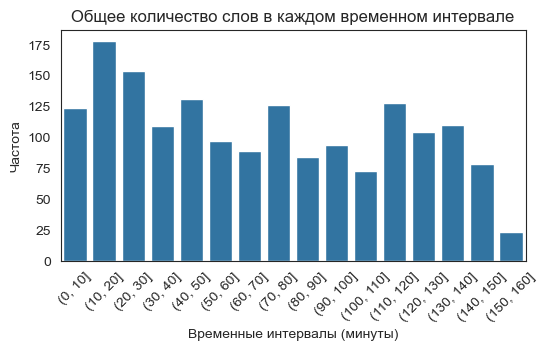

In [153]:
count_word = tarantino2.groupby('time_interval', observed=False).size().reset_index(name='count')
# Построим гистограммы распределения проклятий по времени
plt.figure(figsize=(6,3))  # Установка размера графика
sns.barplot(x='time_interval', y='count', data=count_word)
plt.title('Общее количество слов в каждом временном интервале')
plt.xlabel('Временные интервалы (минуты)')
plt.ylabel('Частота')
plt.xticks(rotation=45)  # Поворачиваем метки по оси X для лучшей читаемости

# Отображение графика
plt.show()

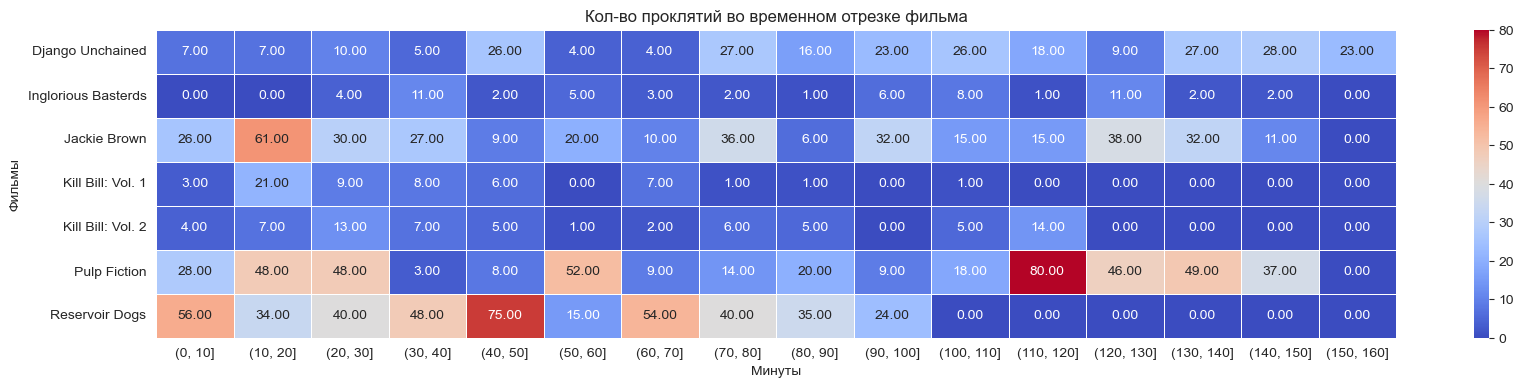

In [157]:
#сделаем тепловую карту покаждому фильму
heatmap_data = tarantino2.groupby(['movie', 'time_interval'], observed=False)['word'].size().unstack()

plt.figure(figsize=(20, 4))  # Установка размера графика
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Кол-во проклятий во временном отрезке фильма')
plt.xlabel('Минуты')
plt.ylabel('Фильмы')

# Отображение графика
plt.show()

In [200]:
tarantino2_quantile = tarantino2.groupby(['movie'])['minutes_in']
#опаределяем квантили
tarantino2_quantile.quantile([0.25, 0.5, 0.75])

movie                    
Django Unchained     0.25     71.2075
                     0.50    101.7250
                     0.75    132.5450
Inglorious Basterds  0.25     38.5175
                     0.50     91.2800
                     0.75    119.0050
Jackie Brown         0.25     20.3325
                     0.50     70.0250
                     0.75    111.4100
Kill Bill: Vol. 1    0.25     13.1800
                     0.50     25.1200
                     0.75     46.4700
Kill Bill: Vol. 2    0.25     21.5200
                     0.50     49.2000
                     0.75    103.2300
Pulp Fiction         0.25     29.6700
                     0.50     96.3200
                     0.75    121.1200
Reservoir Dogs       0.25     22.8000
                     0.50     44.6500
                     0.75     69.4800
Name: minutes_in, dtype: float64

<Figure size 1000x3000 with 0 Axes>

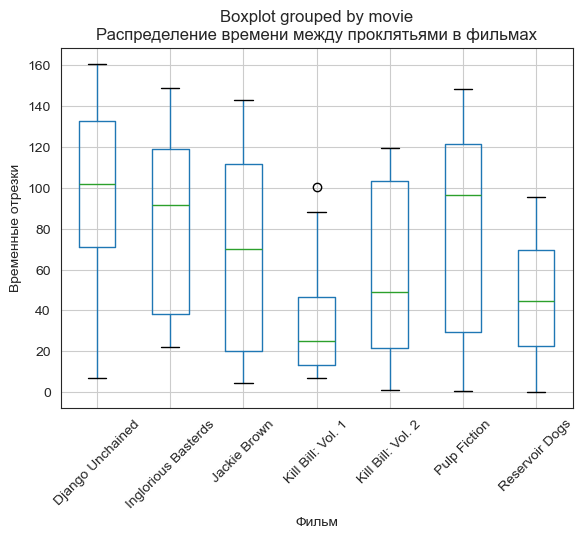

In [202]:
#задаем размер фигуры
fig = plt.figure(figsize=(10,30))

#строим боксплот
tarantino2.boxplot(column=['minutes_in'], by='movie')


plt.title('Распределение времени между проклятьями в фильмах')
plt.xlabel('Фильм')
plt.ylabel('Временные отрезки')
plt.xticks(rotation=45)
#выводим на экран
plt.show()